### REFERÊNCIA

https://www.youtube.com/watch?v=WOUMZatSiLM

<hr>

### IMPORTAÇÕES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import is_numeric_dtype

> <hr>

### DATASET

In [2]:
# substituindo 'caminho/do/seu/iris.data' pelo caminho real do seu arquivo Iris.data e 'iris.csv' pelo nome desejado para o arquivo CSV de saída.
input_file = 'C:\\JupyterLab\\PAPL-UFPE\\ML-Fuzzy\\Testes\\iris.data'
output_file = 'iris.csv'

# carregando arquivo no pandas
iris_data = pd.read_csv(input_file, header=None, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

# salvando em comma separated values (csv)
iris_data.to_csv(output_file, index=False)

In [3]:
# normalização
for index in iris_data.columns: # em suma, para as colunas do DataFrame, vamos analisar se os dados são numéricos
    # se os dados forem numéricos, eles serão normalizados
    if is_numeric_dtype(iris_data[index][0]): # retomando uma função do pandas
        iris_data[index] = iris_data[index]/max(iris_data[index])

In [4]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,0.645570,0.795455,0.202899,0.08,Iris-setosa
1,0.620253,0.681818,0.202899,0.08,Iris-setosa
2,0.594937,0.727273,0.188406,0.08,Iris-setosa
3,0.582278,0.704545,0.217391,0.08,Iris-setosa
4,0.632911,0.818182,0.202899,0.08,Iris-setosa


**ANALISANDO A DISTRIBUIÇÃO DOS DADOS**

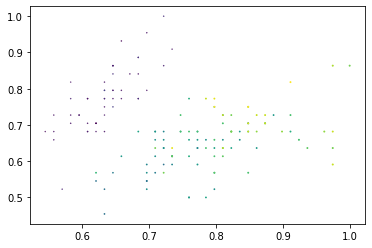

In [5]:
# todos os dados
data=iris_data.loc[:,['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
plt.scatter(data.sepal_length, data.sepal_width, data.petal_length, data.petal_width)

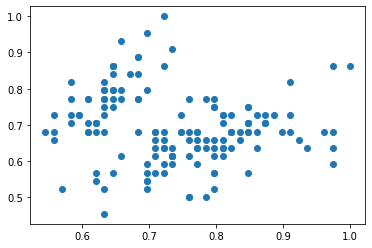

In [6]:
# data only according to sepal
data=iris_data.loc[:,['sepal_length', 'sepal_width']]
plt.scatter(data.sepal_length, data.sepal_width)

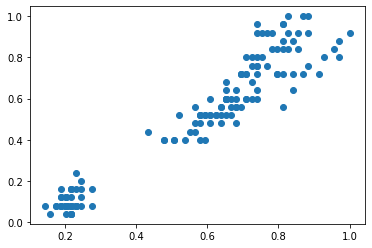

In [7]:
# data accoording only to petal
data=iris_data.loc[:,['petal_length', 'petal_width']]
plt.scatter(data.petal_length, data.petal_width)

> <hr>

### FUZZY C-MEANS

In [8]:
iris_data = np.array(iris_data)
iris_data # shoukd be a 2d array

array([[0.6455696202531644, 0.7954545454545454, 0.20289855072463767,
        0.08, 'Iris-setosa'],
       [0.620253164556962, 0.6818181818181818, 0.20289855072463767, 0.08,
        'Iris-setosa'],
       [0.5949367088607594, 0.7272727272727273, 0.18840579710144928,
        0.08, 'Iris-setosa'],
       [0.5822784810126581, 0.7045454545454545, 0.21739130434782608,
        0.08, 'Iris-setosa'],
       [0.6329113924050632, 0.8181818181818181, 0.20289855072463767,
        0.08, 'Iris-setosa'],
       [0.6835443037974683, 0.8863636363636362, 0.24637681159420288,
        0.16, 'Iris-setosa'],
       [0.5822784810126581, 0.7727272727272726, 0.20289855072463767,
        0.12, 'Iris-setosa'],
       [0.6329113924050632, 0.7727272727272726, 0.21739130434782608,
        0.08, 'Iris-setosa'],
       [0.5569620253164557, 0.6590909090909091, 0.20289855072463767,
        0.08, 'Iris-setosa'],
       [0.620253164556962, 0.7045454545454545, 0.21739130434782608, 0.04,
        'Iris-setosa'],
       [0.68

In [9]:
iris_data_without_last_column = iris_data[:, :-1]
iris_data_without_last_column

array([[0.6455696202531644, 0.7954545454545454, 0.20289855072463767,
        0.08],
       [0.620253164556962, 0.6818181818181818, 0.20289855072463767, 0.08],
       [0.5949367088607594, 0.7272727272727273, 0.18840579710144928,
        0.08],
       [0.5822784810126581, 0.7045454545454545, 0.21739130434782608,
        0.08],
       [0.6329113924050632, 0.8181818181818181, 0.20289855072463767,
        0.08],
       [0.6835443037974683, 0.8863636363636362, 0.24637681159420288,
        0.16],
       [0.5822784810126581, 0.7727272727272726, 0.20289855072463767,
        0.12],
       [0.6329113924050632, 0.7727272727272726, 0.21739130434782608,
        0.08],
       [0.5569620253164557, 0.6590909090909091, 0.20289855072463767,
        0.08],
       [0.620253164556962, 0.7045454545454545, 0.21739130434782608, 0.04],
       [0.6835443037974683, 0.8409090909090908, 0.21739130434782608,
        0.08],
       [0.6075949367088607, 0.7727272727272726, 0.2318840579710145, 0.08],
       [0.607594936

**CONDIÇÕES INICIAIS**

In [10]:
# number of clusters
K = 3

# fuziness valor 
m = 2

# membership
U = np.random.rand(iris_data_without_last_column.shape[0], K)
U # lembrando que os dados já foram normalizados

array([[0.36135814, 0.83117537, 0.57298292],
       [0.0522314 , 0.64099773, 0.97488499],
       [0.11710215, 0.83337373, 0.22650715],
       [0.7473456 , 0.82304886, 0.85854266],
       [0.39694616, 0.00974629, 0.63681551],
       [0.25560373, 0.71436694, 0.44081749],
       [0.43404683, 0.22098693, 0.64619771],
       [0.67836546, 0.76612659, 0.637087  ],
       [0.95145828, 0.44764202, 0.94296525],
       [0.41954074, 0.37125852, 0.91823888],
       [0.09777538, 0.65196467, 0.24775503],
       [0.17573987, 0.38000313, 0.84694935],
       [0.1722305 , 0.20519876, 0.26919582],
       [0.88715138, 0.87677793, 0.07898963],
       [0.94120336, 0.55332771, 0.82461926],
       [0.53164328, 0.52736599, 0.94681553],
       [0.50294697, 0.14350255, 0.3889458 ],
       [0.94719167, 0.55638119, 0.57754295],
       [0.78363413, 0.18385261, 0.33760903],
       [0.01971189, 0.95958935, 0.01952765],
       [0.58534934, 0.36695976, 0.13532583],
       [0.96205296, 0.15608702, 0.20780893],
       [0.

In [11]:
# calculo dos centroides
# envolve matriz
# soma da multiplicação de cada 

# precisamos de 3 centroides
def calculando_centroides(iris_data_without_last_column, K, U, m):
    centroides = np.zeros((K, iris_data_without_last_column.shape[1]))
    for i in range (K):
        centroides[i,:] = np.sum((U[:, i] ** m)[:, np.newaxis] * iris_data_without_last_column, axis = 0)/np.sum(U[:, i] ** m)
    return centroides

In [12]:
centroides = calculando_centroides(iris_data_without_last_column, K, U, m)

In [27]:
def distancia_gaussiana(iris_data_without_last_column, centroides, sigma):
    """
    Calcula a distância usando a função gaussiana entre as matrizes x e y.

    Parâmetros:
    - x, y: os pontos a serem comparados, sendo eles os dados e os centroides.
    - sigma: PARÂMETRO QUE CONTROLA A > LARGURA < DO KERNEL GAUSSIANO

    Retorna:
    - Uma matriz de distâncias onde cada elemento (i, j) representa a distância gaussiana entre x[i] e y[j].
    """
   # print("Shapes em distancia_gaussiana:")
    #print("x shape:", iris_data_without_last_column.shape)
    #print("y shape:", centroides.shape)
    #print()
    
    # tentando resolver o problema dimensional
    iris_data_without_last_column = iris_data_without_last_column.reshape(1, -1)
    
    #euclidiana = np.linalg.norm(iris_data_without_last_column[:, np.newaxis, :] - centroides, axis=1)  # Distâncias euclidianas entre todos os pares de pontos
    diferenca = iris_data_without_last_column - centroides
    euclidiana = np.sqrt(np.sum(diferenca**2))
    gaussian_values = np.exp(- (euclidiana**2) / (2 * sigma**2))  # Função gaussiana # dá pra escrever o sigma diferente se der erro
    return gaussian_values

In [28]:
def matriz_dg(iris_data_without_last_column, centroides, sigma):
    """
    Calcula a matriz de distâncias usando a função gaussiana entre todos os pontos e os centroides.

    Parâmetros:
    - data: matriz representando os pontos a serem comparados.
    - centroides: matriz c/ os centroides.
    - sigma: PARÂMETRO QUE CONTROLA A > LARGURA < DO KERNEL GAUSSIANO

    Retorna:
    - Uma matriz de distâncias onde cada elemento (i, j) representa a distância gaussiana entre o ponto i e o centroide j.
    """
   # print("Shapes em matriz_dg:")
    #print("iris_data_without_last_column shape:", iris_data_without_last_column.shape)
    #print("centroides shape:", centroides.shape)
    #print()
    
    num_points = iris_data_without_last_column.shape[0]
    num_centroides = centroides.shape[0]

    distancias = np.zeros((num_points, num_centroides))

    for i in range(num_points):
        for j in range(num_centroides):
            distancias[i, j] = distancia_gaussiana(iris_data_without_last_column[i], centroides[j], sigma)

    return distancias

In [29]:
sigma_value = 1.0
# Supondo que você já tenha definido K, U, m, sigma_value, iris_data_without_last_column e centroids

# Calcula a matriz de distâncias usando a função gaussian_distance_matrix
d_matriz = matriz_dg(iris_data_without_last_column, centroides, sigma_value)

# Exibe a matriz de distâncias
print("Matriz de Distâncias:")
print(d_matriz)

Matriz de Distâncias:
[[0.86927926 0.8593526  0.8591608 ]
 [0.87127758 0.86140708 0.86121843]
 [0.86380767 0.85368344 0.85348948]
 [0.87095917 0.86106661 0.86087721]
 [0.86601334 0.85603655 0.85584349]
 [0.89657927 0.88799865 0.88783017]
 [0.87714406 0.86746073 0.8672743 ]
 [0.87407837 0.86424766 0.86405799]
 [0.86267291 0.85268075 0.85249053]
 [0.8612484  0.85107325 0.85087826]
 [0.87090469 0.86120661 0.86101802]
 [0.87544938 0.86566586 0.86547706]
 [0.85582198 0.84553371 0.84533718]
 [0.83420777 0.82345825 0.82325373]
 [0.84885896 0.8390174  0.83882521]
 [0.86515131 0.8565152  0.85634398]
 [0.88018099 0.871088   0.87091045]
 [0.88219341 0.87267855 0.87249457]
 [0.88963552 0.88075203 0.88057797]
 [0.87829441 0.86887824 0.86869482]
 [0.88531342 0.87590223 0.87571993]
 [0.89309684 0.88412594 0.88395135]
 [0.84251782 0.8319731  0.83177017]
 [0.9197954  0.91164436 0.91148666]
 [0.88625649 0.87685716 0.87667519]
 [0.88058047 0.87099111 0.87080744]
 [0.90286549 0.89402798 0.89385703]
 [0.87

In [16]:
#print(d_matriz) #supostamente, distância de cada ponto em relação a cada centroide

**OBSERVAÇÕES**
<br>uh to meio na dúvida aqui
<br> preciso que a distância seja calculada para cada ponto em relação a cada um dos centroides, mas não sei <br>se isso está acontecendo
<br>ACHO que é isso que está rolando sim

In [17]:
def membership_c (iris_data_without_last_column, centroides, K, m):
    U_novo = np.zeros_like(d_matriz)
    # iterar sobre K
    for i in range(K):
        U_novo[:, i] = d_matriz[:, i]

    U_novo = 1/(U_novo ** (2/(m-1)) * np.sum((1/U_novo) ** (2/(m-1)), axis = 1)[:, np.newaxis])
    return U_novo

# Ou simplesmente copiar todos os valores da matriz de distâncias para U_novo (?)
#U_novo = d_matriz.copy()

In [26]:
#U_novo = 1/(U_novo ** (2/(m-1)) * np.sum((1/U_novo) ** (2/(m-1)), axis = 1)[:, np.newaxis])
#U_novo

U_novo = membership_c(iris_data_without_last_column, centroides, K, m)
U_novo

array([[0.34111609, 0.32955284, 0.32933107],
       [0.34127059, 0.32943909, 0.32929031],
       [0.34139799, 0.32939996, 0.32920205],
       [0.34126437, 0.32947788, 0.32925775],
       [0.34113348, 0.32956011, 0.32930641],
       [0.33956465, 0.33033156, 0.33010379],
       [0.34075396, 0.32973525, 0.32951078],
       [0.34107509, 0.3295771 , 0.3293478 ],
       [0.3414602 , 0.32936544, 0.32917436],
       [0.3417129 , 0.32925486, 0.32903224],
       [0.34088587, 0.3296763 , 0.32943783],
       [0.34105148, 0.32960863, 0.32933989],
       [0.34185721, 0.32917178, 0.32897101],
       [0.34230803, 0.32895523, 0.32873674],
       [0.34097435, 0.32961459, 0.32941106],
       [0.33956085, 0.33034911, 0.33009003],
       [0.33993428, 0.33011729, 0.32994843],
       [0.34056455, 0.32980879, 0.32962666],
       [0.34002917, 0.33009076, 0.32988007],
       [0.34042078, 0.32991739, 0.32966183],
       [0.34075206, 0.32972858, 0.32951936],
       [0.33988685, 0.33015473, 0.32995842],
       [0.

In [19]:
labels = np.argmax(U_novo, axis = 1)
labels
# class of each dataset

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2,
       2, 0, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 1, 2, 2, 2,
       1, 2, 1, 2, 2, 0, 2, 1, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

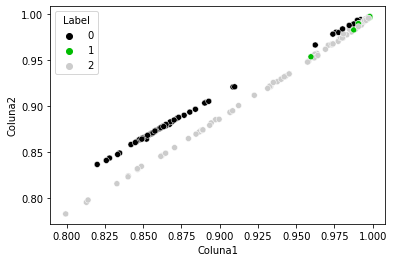

In [20]:
# Crie um DataFrame para o gráfico de dispersão
df_plot = pd.DataFrame({'Coluna1': d_matriz[:, 0], 'Coluna2': d_matriz[:, 1], 'Label': labels})

# Crie o gráfico de dispersão usando Seaborn
sns.scatterplot(data = df_plot, x='Coluna1', y='Coluna2', hue='Label', palette='nipy_spectral')

# Exiba o gráfico
plt.show()

In [21]:
# ayo ladies and gentlemen
# tá muito bão esse aí não né, não enxergo as cinzas caso elas existam

In [22]:
max_iteration = 100
for iteration in range(max_iteration): 
    centroides = calculando_centroides(iris_data_without_last_column, K, U, m)
    U_novo = membership_c(iris_data_without_last_column, centroides, K, m)
    
    labels = np.argmax(U_novo, axis = 1)
    
    if np.linalg.norm (U_novo - U) <= 0.00001:
        break 
    U = U_novo
    
    labels = np.argmax(U_novo, axis = 1)

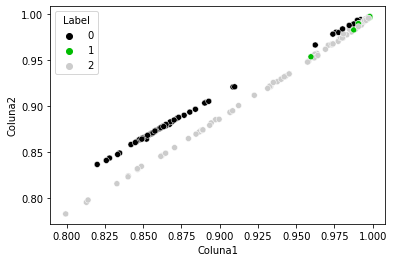

In [23]:
sns.scatterplot(data = df_plot, x='Coluna1', y='Coluna2', hue='Label', palette='nipy_spectral')

# Exiba o gráfico
plt.show()

era pra mudar algo mona :(
<br>acho que preciso mudar como chamo o scatter

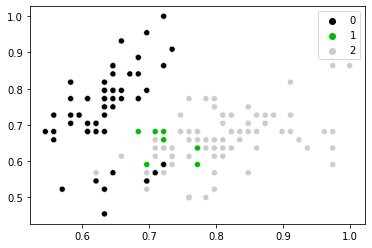

In [24]:
sns.scatterplot(data = iris_data_without_last_column, x=iris_data_without_last_column[:, 0], y=iris_data_without_last_column[:, 1], hue= labels, palette='nipy_spectral')

# Exiba o gráfico
plt.show()